In [1]:
# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
# These imports are actually NOT NEEDED if you already know the name of
# the ttree within the root file.
import math
from math import exp
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm

import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.mlab as mlab
from pylab import rcParams
plt.rcParams.update({'font.size': 18})



from root_numpy import root2array
from scipy.interpolate import interp1d
from scipy.misc import factorial

Welcome to JupyROOT 6.12/06


In [2]:
# myfile = '/uboone/data/users/abhat/GammaCatcher/data_extbnb_mcc9.0_csu_run1_reco2_cluster_track_hadd.root' #1 hit clusters exculded
# myfile_low ='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/ClusterTrackDistance_OVERLAY_hadd_hist.root'
myfile='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/ClusterTrackDistance_OVERLAY_hadd_hist.root'

In [3]:
df = pd.DataFrame( root2array( myfile,'/gamma3dsps/Clustertree' ) )
df2 = pd.DataFrame( root2array( myfile,'/gamma3dsps/Matchingtree' ) )


In [4]:
print df.columns.values
print df2.columns.values



['cluster_hit_z' 'cluster_hit_x' 'Z_reco_best' 'X_reco_best'
 'distance_smallest' 'plane']
['V_biggest_iou' 'V_match_multiplicity' 'U_biggest_iou'
 'U_match_multiplicity' 'Y_clus_lifetime' 'Y_clus_hitSize'
 'V_clus_hitSize' 'U_clus_hitSize' 'Y_cluster_3d_hit_z'
 'Y_cluster_3d_hit_x' 'Y_cluster_3d_hit_y' 'Z_reco_best3d' 'X_reco_best3d'
 'Y_reco_best3d' 'distance_smallest3d' 'Y_cluster_charge'
 'V_cluster_charge' 'U_cluster_charge' 'YV_iou' 'YU_iou' 'deltaY'
 'deltaY_smallest' 'Y_Wire' 'start_tick_cluster0' 'start_tick_cluster1'
 'start_tick_cluster2' 'end_tick_cluster0' 'end_tick_cluster1'
 'end_tick_cluster2']


In [5]:
df.head()


,cluster_hit_z,cluster_hit_x,Z_reco_best,X_reco_best,distance_smallest,plane
0,0.0,75.901051,0.660413,19.175699,93.923302,0
1,0.0,188.704140,53.371620,192.619736,30.193979,0
2,0.0,220.606658,53.371620,192.619736,40.983073,0
3,0.0,235.469074,50.112911,195.037994,52.141710,0
4,0.0,252.191672,40.591511,202.062958,65.040427,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145100907 entries, 0 to 145100906
Data columns (total 6 columns):
cluster_hit_z        float64
cluster_hit_x        float64
Z_reco_best          float64
X_reco_best          float64
distance_smallest    float64
plane                int32
dtypes: float64(5), int32(1)
memory usage: 5.9 GB


In [7]:
df2.head()

,V_biggest_iou,V_match_multiplicity,U_biggest_iou,U_match_multiplicity,Y_clus_lifetime,Y_clus_hitSize,V_clus_hitSize,U_clus_hitSize,Y_cluster_3d_hit_z,Y_cluster_3d_hit_x,...,YU_iou,deltaY,deltaY_smallest,Y_Wire,start_tick_cluster0,start_tick_cluster1,start_tick_cluster2,end_tick_cluster0,end_tick_cluster1,end_tick_cluster2
0,0.401220,1,-1.000000,0,6.000000,1.0,8.833334e+247,4.940656e-324,8.4,161.233319,...,-1.000000,-9999.000000,0.000000,28,0.000000,4.940656e-324,7.410985e-323,2.370906e-310,6.952718e-310,0.000000
1,0.725190,2,0.850483,1,8.949707,3.0,8.833334e+247,4.940656e-324,39.0,176.128504,...,0.850483,0.173205,0.173205,132,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2,0.725190,1,0.850483,1,6.000000,1.0,1.000000e+00,2.000000e+00,40.8,14.729390,...,0.669427,58.023702,58.023702,136,1078.213623,1.079128e+03,1.077295e+03,1.084886e+03,1.085128e+03,1083.295044
3,-1.000000,0,-1.000000,0,6.000000,1.0,1.000000e+00,2.000000e+00,40.2,225.155024,...,-1.000000,-9999.000000,58.023702,134,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
4,0.963175,1,0.716381,1,6.000000,1.0,1.000000e+00,1.000000e+00,43.5,121.541197,...,0.716381,0.173205,0.173205,145,3021.998779,3.023103e+03,3.022990e+03,3.027999e+03,3.029103e+03,3028.990234


In [8]:
#dist_small_fromDF = np.array( (df['distance_smallest'])*(1000/(2991*4.8*26.006528)))
dist_small_fromDF = np.array( (df['distance_smallest']))

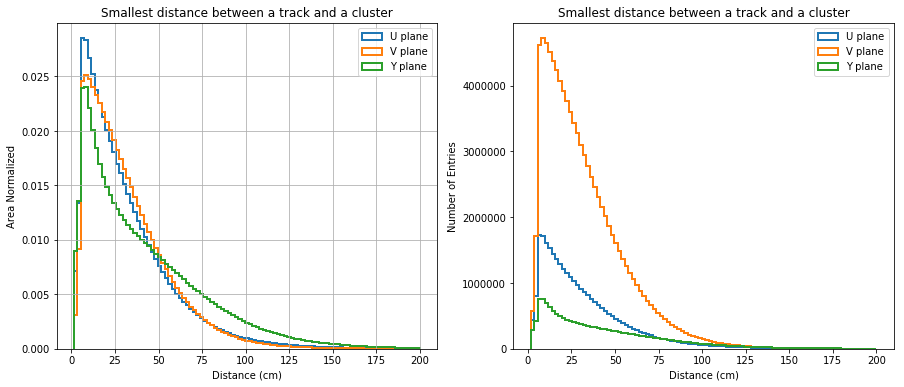

In [9]:
dfU = df.query('plane==0')
dfV = df.query('plane==1')
dfY = df.query('plane==2')
fig = plt.figure(figsize=(15,6))
BINS = np.linspace(1.5,200,100)
plt.subplot(1, 2, 1)
plt.hist(dfU['distance_smallest'].values,bins=BINS,histtype='step',lw=2,label='U plane',density=True)
plt.hist(dfV['distance_smallest'].values,bins=BINS,histtype='step',lw=2,label='V plane',density=True)
plt.hist(dfY['distance_smallest'].values,bins=BINS,histtype='step',lw=2,label='Y plane',density=True)
plt.title("Smallest distance between a track and a cluster")
plt.xlabel('Distance (cm)')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=1)


plt.subplot(1, 2, 2)
plt.hist(dfU['distance_smallest'].values,bins=BINS,histtype='step',lw=2,label='U plane')#,normed=True)
plt.hist(dfV['distance_smallest'].values,bins=BINS,histtype='step',lw=2,label='V plane')#,normed=True)
plt.hist(dfY['distance_smallest'].values,bins=BINS,histtype='step',lw=2,label='Y plane')#,normed=True)
plt.grid()
plt.title("Smallest distance between a track and a cluster")
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Entries')
plt.grid()
plt.legend(loc=1)
plt.show()

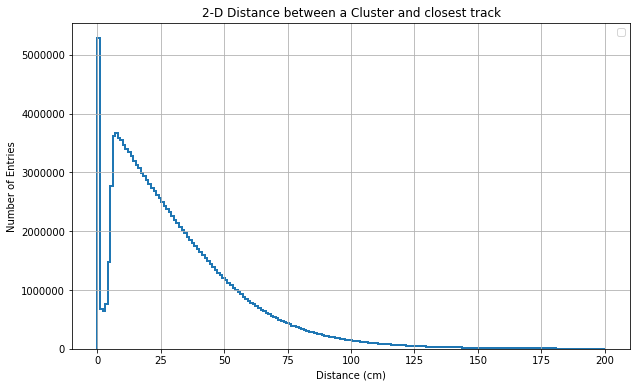

In [10]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,200,200)
plt.hist(df['distance_smallest'].values,bins=BINS,histtype='step',lw=2)
plt.title("2-D Distance between a Cluster and closest track")# in the Clean Region of MicroBooNE")
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Entries')
plt.grid()

plt.legend(loc=1)
plt.show()
#plt.draw()


In [11]:
Y_clus_hitSize_fromDF2 = np.array( df2['Y_clus_hitSize'] )
V_match_multiplicity_fromDF2 = np.array( df2['V_match_multiplicity'] )
Y_clus_lifetime_fromDF2 = np.array( df2['Y_clus_lifetime'] )
U_match_multiplicity_fromDF2 = np.array( df2['U_match_multiplicity'] )
U_biggest_iou_fromDF2 = np.array( df2['U_biggest_iou'] )
V_biggest_iou_fromDF2 = np.array( df2['V_biggest_iou'] )


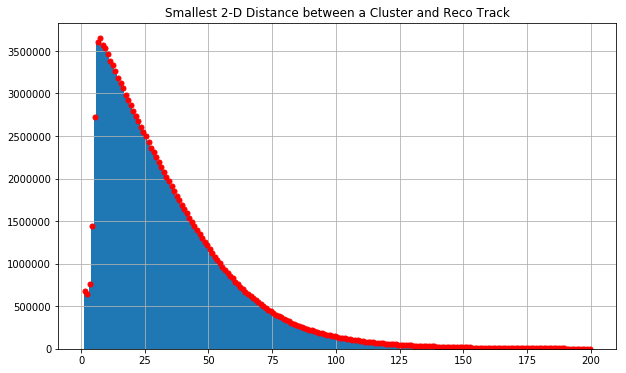

In [12]:
plt.figure(figsize=(10,6))
plt.grid(True) #ALWAYS TRUE
mybins = np.linspace(1,200,200)
plt.title("Smallest 2-D Distance between a Cluster and Reco Track")
binv, bine = np.histogram(dist_small_fromDF,bins=mybins)
binc = 0.5*(bine[1:]+bine[:-1])
binv = binv.astype(float)
errors = np.sqrt(binv)
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)
poop = plt.hist(dist_small_fromDF,bins=mybins)
#plt.yscale('log')
plt.show()

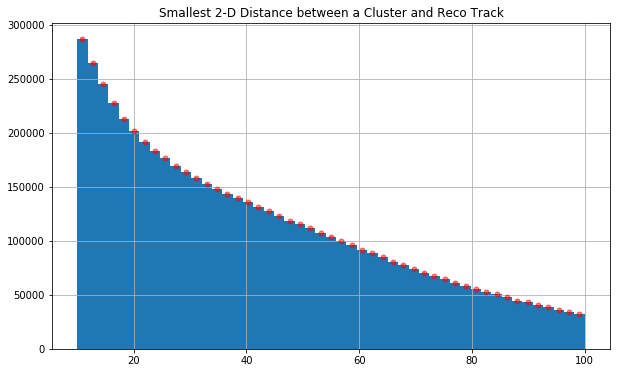

In [13]:
dfW = df.query('(cluster_hit_z>800 or (cluster_hit_z>400 and cluster_hit_z<600)) and plane==2')


plt.figure(figsize=(10,6))
plt.grid(True) #ALWAYS TRUE
mybins = np.linspace(10,100,50)
plt.title("Smallest 2-D Distance between a Cluster and Reco Track")
binv, bine = np.histogram(dfW['distance_smallest'].values,bins=mybins)
binc = 0.5*(bine[1:]+bine[:-1])
binv = binv.astype(float)
errors = np.sqrt(binv)
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5,alpha=0.5)
poop = plt.hist(dfW['distance_smallest'].values,bins=mybins)
plt.show()
fig.savefig('Distance_low_threshold.png', dpi=600)

In [14]:
#def fun(x, a, b, c, d):
def fun(x, a, b, c):
    #return a*exp(-x/b)+c*exp(-x/d)
    #return a*exp(-x/b) +(c*x)+d
    return a*exp(-x/b)  + c
f2 = np.vectorize(fun)
fun(5.,2,2,2)

2.1641699972477975

In [15]:
guess = [binc[1],5.,250]

In [16]:
xvals = np.linspace(bine[0],bine[-1],100)

In [17]:
popt,popv = curve_fit(f2,binc,binv,p0=guess)

In [18]:
print popt

[-1.18201201e+09 -4.94630863e+05  1.18225838e+09]


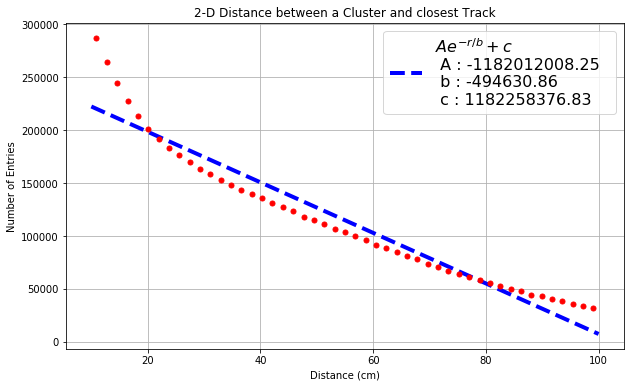

<Figure size 432x288 with 0 Axes>

In [19]:
fig = plt.figure(figsize=(10,6))
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)
plt.plot(xvals,f2(xvals,*popt),'b--',lw=4,\
         label='$Ae^{-r/b} + c$ \n A : %.02f  \n b : %.02f  \n c : %.02f '%(popt[0],popt[1],popt[2]))
#plt.plot([20, 100], [500, 500], 'k-', lw=3)#[x1,x2],[y1,y2]
plt.grid()
plt.title("2-D Distance between a Cluster and closest Track")
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Entries')
plt.legend(loc=1,fontsize=16)
#plt.yscale('log')
plt.show()
plt.draw()
fig.savefig('Fit.png', dpi=600)

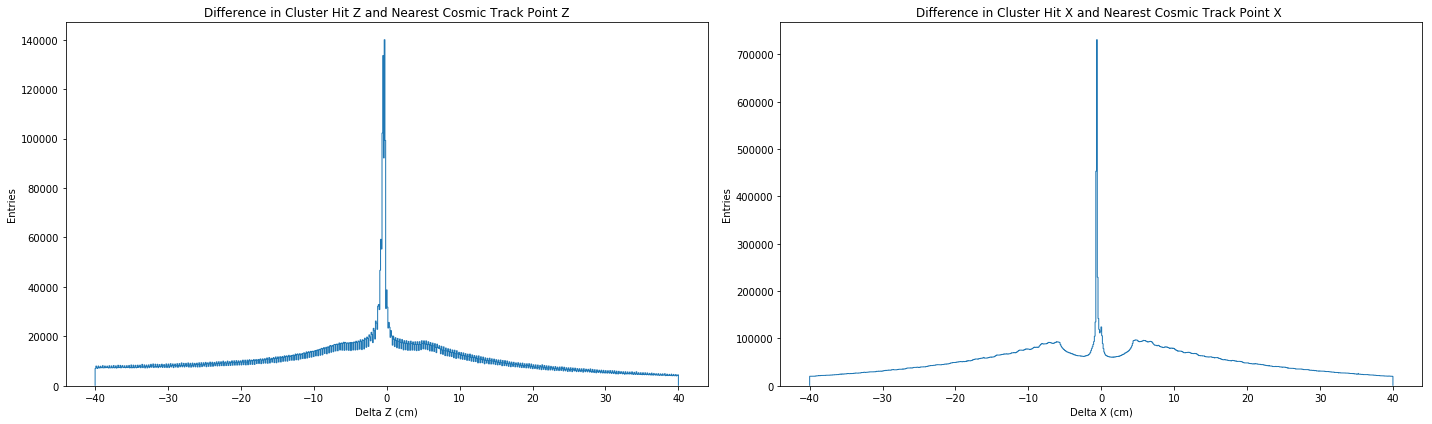

In [20]:
dfCut = df.query('cluster_hit_z>800 or (cluster_hit_z>400 and cluster_hit_z<600)')
fig = plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
BINS = np.linspace(-40,40,800)
#plt.hist2d(dfCut['U_match_multiplicity'].values,dfCut['Y_clus_lifetime'].values, bins=(4,30), range=[[-0.10, 3.5], [4, 30]] , norm=LogNorm())
#plt.colorbar()
plt.hist(dfCut['cluster_hit_z']-dfCut['Z_reco_best'].values, bins=BINS,histtype='step',lw=1)
plt.title('Difference in Cluster Hit Z and Nearest Cosmic Track Point Z')
plt.xlabel('Delta Z (cm)')
plt.ylabel('Entries')

plt.subplot(1, 2, 2)
#plt.hist2d(dfCut3['U_match_multiplicity'].values,dfCut3['Y_clus_lifetime'].values, bins=(4,30), range=[[-0.10, 3.5], [4, 30]] , norm=LogNorm())
#plt.colorbar()
plt.hist(dfCut['cluster_hit_x']-dfCut['X_reco_best'].values, bins=BINS,histtype='step',lw=1)
plt.title('Difference in Cluster Hit X and Nearest Cosmic Track Point X ')
plt.xlabel('Delta X (cm)')
plt.ylabel('Entries')
plt.tight_layout()
plt.show()

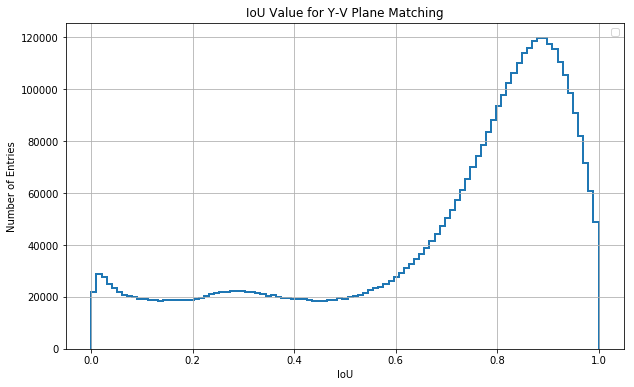

In [21]:
dfCut = df2.query('Y_cluster_3d_hit_z>800 or (Y_cluster_3d_hit_z>400 and Y_cluster_3d_hit_z<600)')

fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,1,100)
plt.hist(dfCut['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2)
plt.title("IoU Value for Y-V Plane Matching")
plt.xlabel('IoU')
plt.ylabel('Number of Entries')
plt.grid()
plt.legend(loc=1)
plt.show()


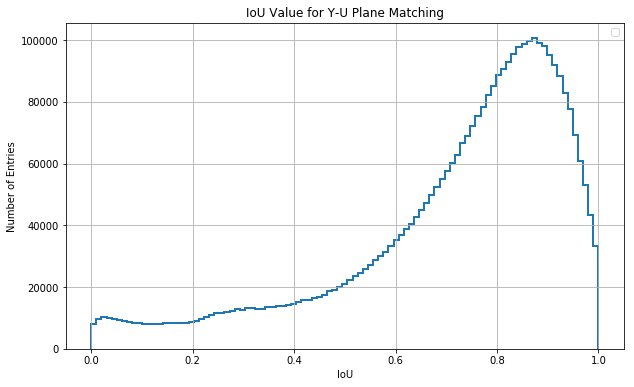

In [22]:

fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,1,100)
plt.hist(dfCut['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2)
plt.title("IoU Value for Y-U Plane Matching")
plt.xlabel('IoU')
plt.ylabel('Number of Entries')
plt.grid()
plt.legend(loc=1)
plt.show()


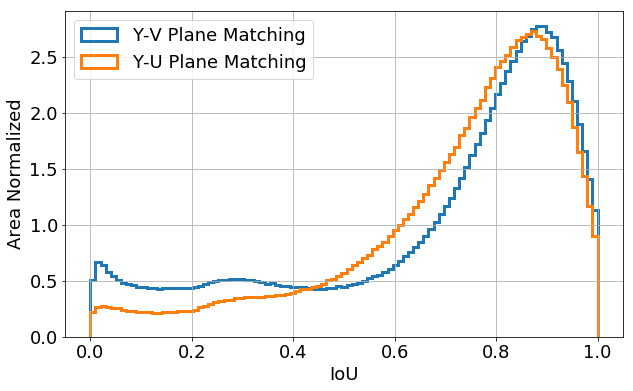

In [23]:
dfCut = df2.query('Y_cluster_3d_hit_z>800 or (Y_cluster_3d_hit_z>400 and Y_cluster_3d_hit_z<600)')
plt.rcParams.update({'font.size': 18})

fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,1,100)
plt.hist(dfCut['V_biggest_iou'].values,bins=BINS,histtype='step',lw=3,label='Y-V Plane Matching',density=True)
plt.hist(dfCut['U_biggest_iou'].values,bins=BINS,histtype='step',lw=3,label='Y-U Plane Matching',density=True)

# plt.title("IoU Value for Y-V Plane Matching")
plt.xlabel('IoU')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=2)
plt.show()

fig.savefig('IoU_comparison.png', dpi=600)


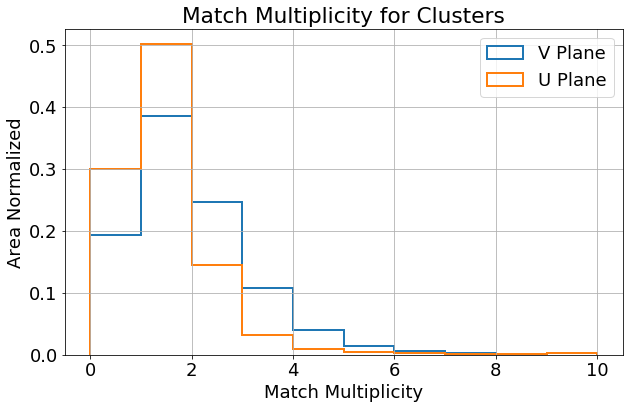

In [24]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,10,11)

plt.hist(dfCut['V_match_multiplicity'].values,bins=BINS,histtype='step',lw=2,label='V Plane',density=True)
plt.hist(dfCut['U_match_multiplicity'].values,bins=BINS,histtype='step',lw=2,label='U Plane',density=True)

plt.title("Match Multiplicity for Clusters")
plt.xlabel('Match Multiplicity')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=1)
plt.show()


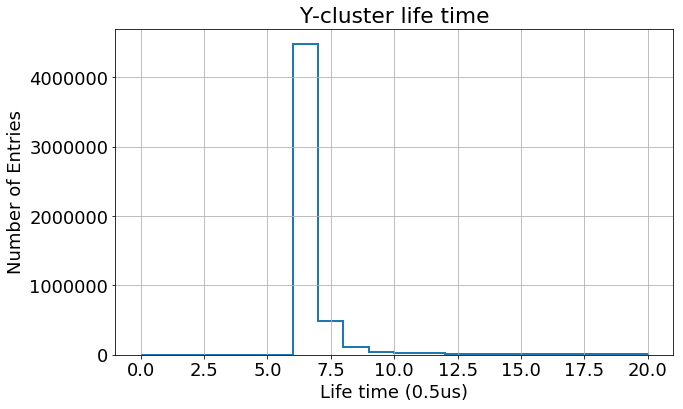

In [25]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,20,21)
plt.hist(dfCut['Y_clus_lifetime'].values,bins=BINS,histtype='step',lw=2)
plt.title("Y-cluster life time")
plt.xlabel('Life time (0.5us)')
plt.ylabel('Number of Entries')
plt.grid()
# plt.legend(loc=1)
plt.show()


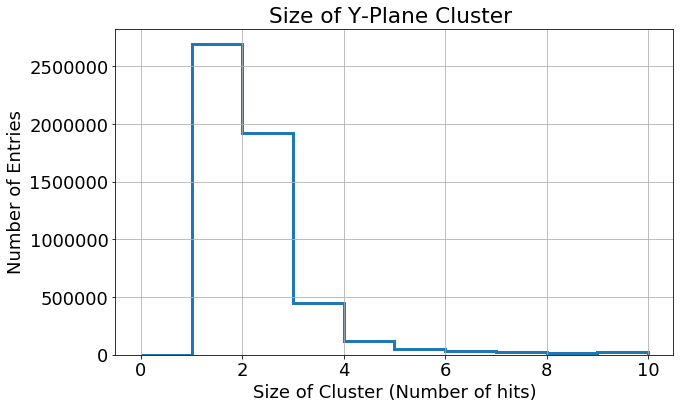

In [26]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,10,11)
plt.hist(dfCut['Y_clus_hitSize'].values,bins=BINS,histtype='step',lw=3)

plt.title("Size of Y-Plane Cluster ")
plt.xlabel('Size of Cluster (Number of hits)')
plt.ylabel('Number of Entries')
plt.grid()
# plt.xticks(np.arange(0, len(dfCut['Y_clus_hitSize'])+1, 5))
plt.show()

fig.savefig('yhitsize.png', dpi=600)



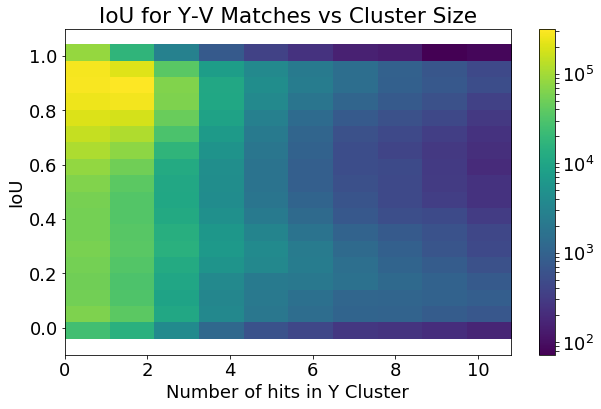

In [27]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(dfCut['Y_clus_hitSize'].values,dfCut['V_biggest_iou'].values, bins=(10,20), range=[[0, 10.8], [-0.10, 1.10]] , norm=LogNorm())
plt.colorbar()
plt.title(' IoU for Y-V Matches vs Cluster Size ')
plt.xlabel('Number of hits in Y Cluster')
plt.ylabel('IoU')
plt.show()

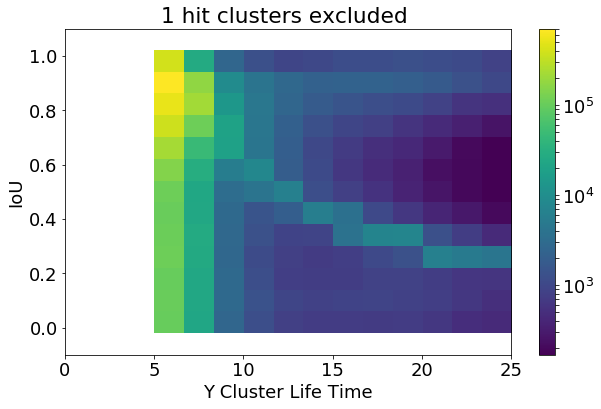

In [28]:
fig = plt.figure(figsize=(10,6))

plt.hist2d(dfCut['Y_clus_lifetime'].values,dfCut['V_biggest_iou'].values, bins=15, range=[[0, 25], [-0.10, 1.10]] , norm=LogNorm())
plt.colorbar()
plt.title('1 hit clusters excluded ')
plt.xlabel('Y Cluster Life Time')
plt.ylabel('IoU')


plt.show()

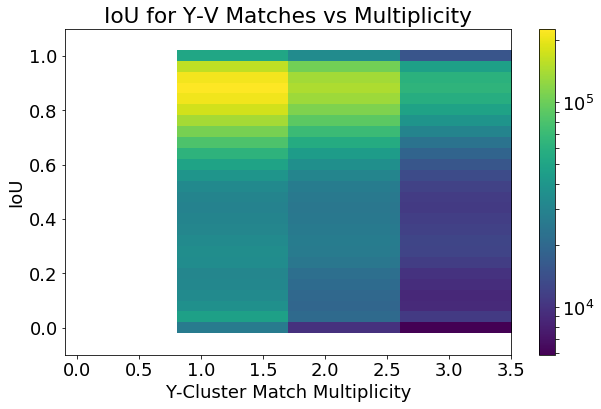

In [29]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(dfCut['V_match_multiplicity'].values,dfCut['V_biggest_iou'].values, bins=(4,30), range=[[-0.1, 3.5], [-0.10, 1.10]] , norm=LogNorm())
plt.colorbar()
plt.title('IoU for Y-V Matches vs Multiplicity')
plt.xlabel('Y-Cluster Match Multiplicity')
plt.ylabel('IoU')
plt.show()

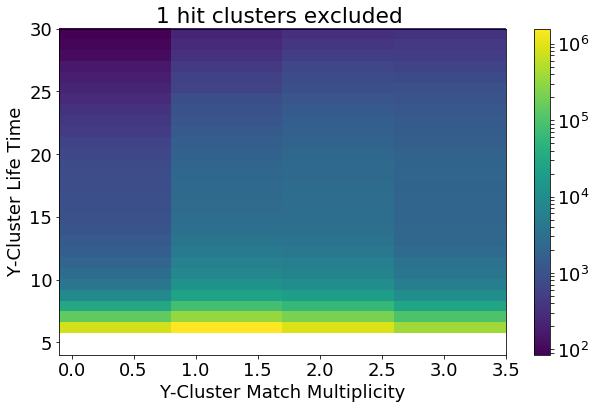

In [30]:
fig = plt.figure(figsize=(10,6))

plt.hist2d(dfCut['V_match_multiplicity'].values,dfCut['Y_clus_lifetime'].values, bins=(4,30), range=[[-0.10, 3.5], [4, 30]] , norm=LogNorm())
plt.colorbar()
plt.title('1 hit clusters excluded ')
plt.xlabel('Y-Cluster Match Multiplicity')
plt.ylabel('Y-Cluster Life Time')
plt.show()

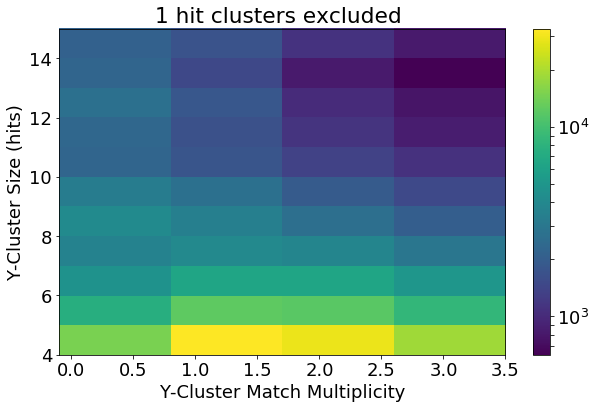

In [31]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(dfCut['V_match_multiplicity'].values,dfCut['Y_clus_hitSize'].values, bins=(4,11), range=[[-0.10, 3.5], [4, 15]] , norm=LogNorm())
plt.colorbar()
plt.title('1 hit clusters excluded ')
plt.xlabel('Y-Cluster Match Multiplicity')
plt.ylabel('Y-Cluster Size (hits)')
plt.show()

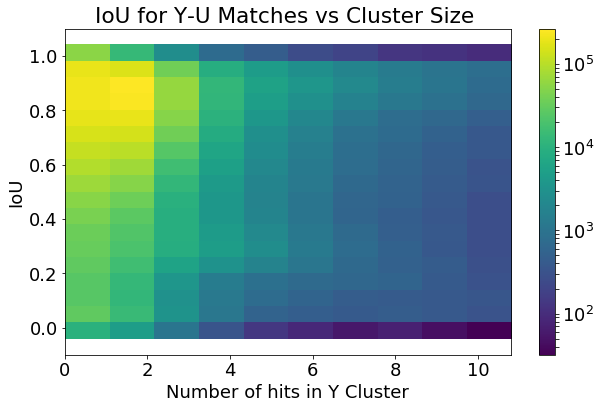

In [32]:
fig = plt.figure(figsize=(10,6))

plt.hist2d(dfCut['Y_clus_hitSize'].values,dfCut['U_biggest_iou'].values, bins=(10,20), range=[[0, 10.8], [-0.10, 1.10]] , norm=LogNorm())
plt.colorbar()
plt.title('IoU for Y-U Matches vs Cluster Size ')
plt.xlabel('Number of hits in Y Cluster')
plt.ylabel('IoU')


plt.show()


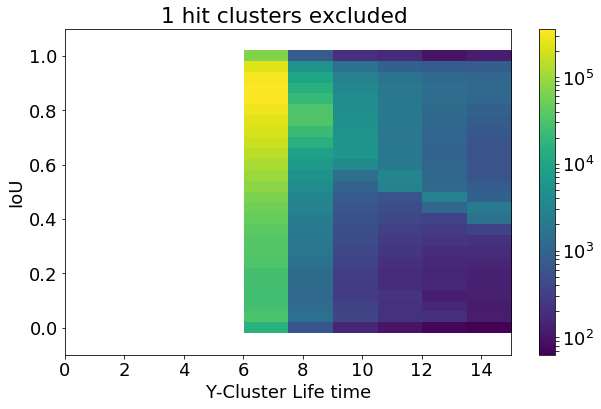

In [33]:
fig = plt.figure(figsize=(10,6))

plt.hist2d(dfCut['Y_clus_lifetime'].values,dfCut['U_biggest_iou'].values, bins=(10,30), range=[[0, 15], [-0.10, 1.10]] , norm=LogNorm())
plt.colorbar()
plt.title('1 hit clusters excluded ')
plt.xlabel('Y-Cluster Life time')
plt.ylabel('IoU')


plt.show()

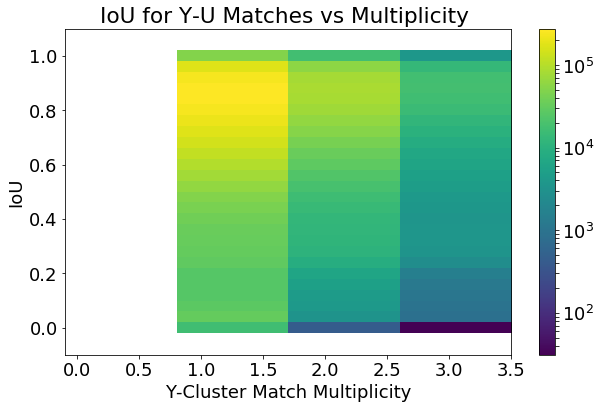

In [34]:
fig = plt.figure(figsize=(10,6))

plt.hist2d(dfCut['U_match_multiplicity'].values,dfCut['U_biggest_iou'].values, bins=(4,30), range=[[-0.1, 3.5], [-0.10, 1.10]] , norm=LogNorm())
plt.colorbar()
plt.title('IoU for Y-U Matches vs Multiplicity ')
plt.xlabel('Y-Cluster Match Multiplicity')
plt.ylabel('IoU')

plt.show()

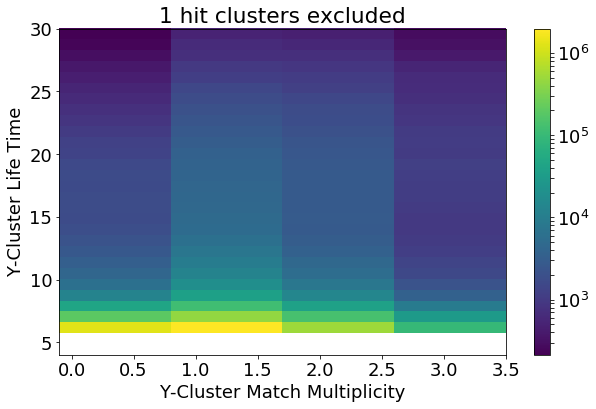

In [35]:
fig = plt.figure(figsize=(10,6))

plt.hist2d(dfCut['U_match_multiplicity'].values,dfCut['Y_clus_lifetime'].values, bins=(4,30), range=[[-0.10, 3.5], [4, 30]] , norm=LogNorm())
plt.colorbar()
plt.title('1 hit clusters excluded')
plt.xlabel('Y-Cluster Match Multiplicity')
plt.ylabel('Y-Cluster Life Time')


plt.show()


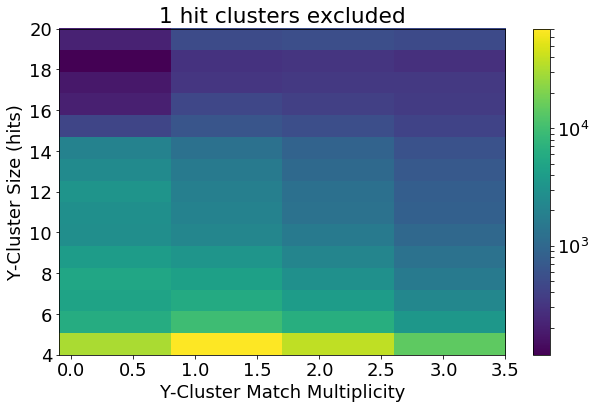

In [36]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(dfCut['U_match_multiplicity'].values,dfCut['Y_clus_hitSize'].values, bins=(4,15), range=[[-0.10, 3.5], [4, 20]] , norm=LogNorm())
plt.colorbar()
plt.title('1 hit clusters excluded')
plt.xlabel('Y-Cluster Match Multiplicity')
plt.ylabel('Y-Cluster Size (hits)')
plt.show()

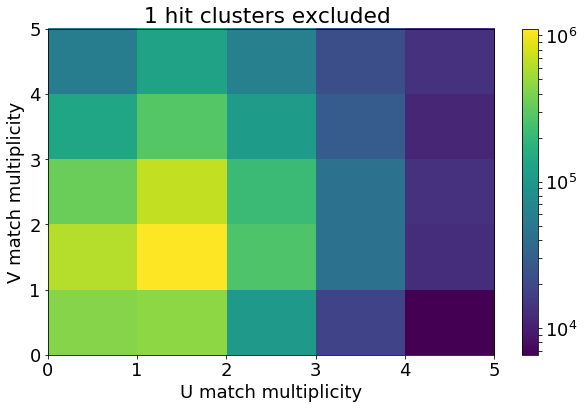

In [37]:
fig = plt.figure(figsize=(10,6))

plt.hist2d(dfCut['U_match_multiplicity'].values,dfCut['V_match_multiplicity'].values, bins=(5), range=[[0, 5], [0, 5]] , norm=LogNorm())
plt.colorbar()
plt.title('1 hit clusters excluded ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()

5393301


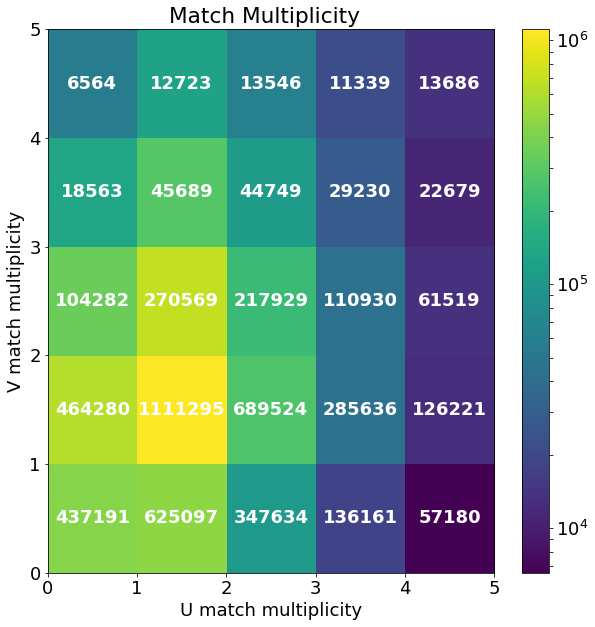

In [38]:
print len (dfCut)
fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(dfCut['U_match_multiplicity'].values,dfCut['V_match_multiplicity'].values, bins=(5), range=[[-0.0000001, 5], [-0.00000010, 5]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold")

plt.colorbar()
plt.title('Match Multiplicity  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()
fig.savefig('Match.png', dpi=500)


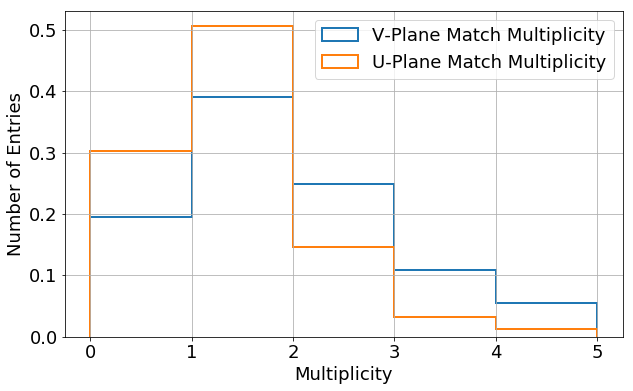

In [39]:

fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,5,6)

plt.hist(dfCut['V_match_multiplicity'].values,bins=BINS,histtype='step',lw=2,label='V-Plane Match Multiplicity',density=True)
plt.hist(dfCut['U_match_multiplicity'].values,bins=BINS,histtype='step',lw=2,label='U-Plane Match Multiplicity',density=True)

plt.xlabel('Multiplicity')
plt.ylabel('Number of Entries')
plt.grid()
plt.legend(loc=1)
plt.show()
fig.savefig('Match_multiplicity.png', dpi=500)

Text(0,0.5,'Number of Entries')

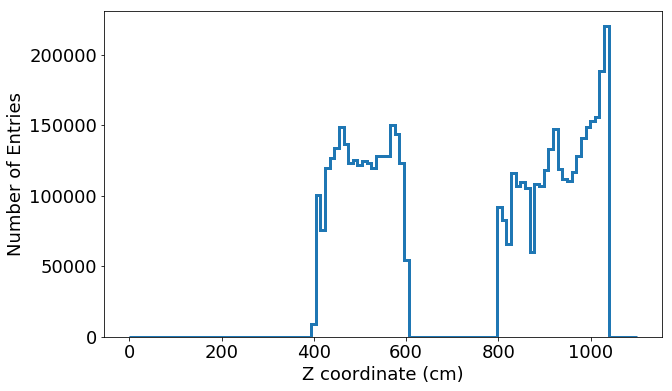

In [40]:

fig = plt.figure(figsize=(10,6))

BINS = np.linspace(0,1100,110)
plt.hist(dfCut['Y_cluster_3d_hit_z'].values, bins=BINS,histtype='step',lw=3,label='Z Coordinate from Cluster Wire (Clean Cut)')


# plt.title('Z Coordinate (cm) ')
# plt.legend(loc=2)
plt.xlabel('Z coordinate (cm)')
plt.ylabel('Number of Entries')


Text(0,0.5,'Number of Entries')

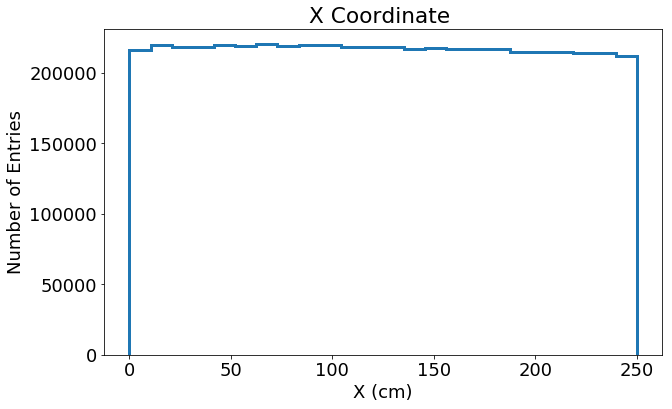

In [41]:

fig = plt.figure(figsize=(10,6))

BINS = np.linspace(0,250,25)
plt.hist(dfCut['Y_cluster_3d_hit_x'].values, bins=BINS,histtype='step',lw=3,label='X Coordinate from Cluster Wire (Clean Cut)')
plt.title('X Coordinate ')

plt.xlabel('X (cm)')
plt.ylabel('Number of Entries')


/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


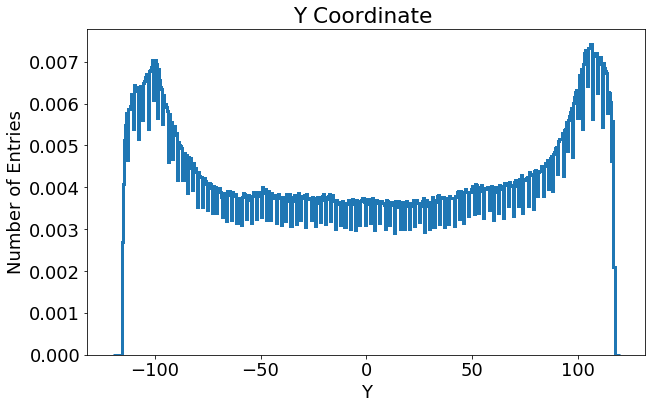

In [42]:
fig = plt.figure(figsize=(10,6))

BINS = np.linspace(-120,120,480)
plt.hist(dfCut['Y_cluster_3d_hit_y'].values, bins=BINS,histtype='step',lw=3,label='Y Coordinate from Cluster Wire for All Bins (Clean Cut)',normed=True)
#plt.colorbar()
plt.title('Y Coordinate ')
# plt.legend(loc=2)
plt.xlabel('Y')
plt.ylabel('Number of Entries')
plt.show()

Text(0,0.5,'Number of Entries')

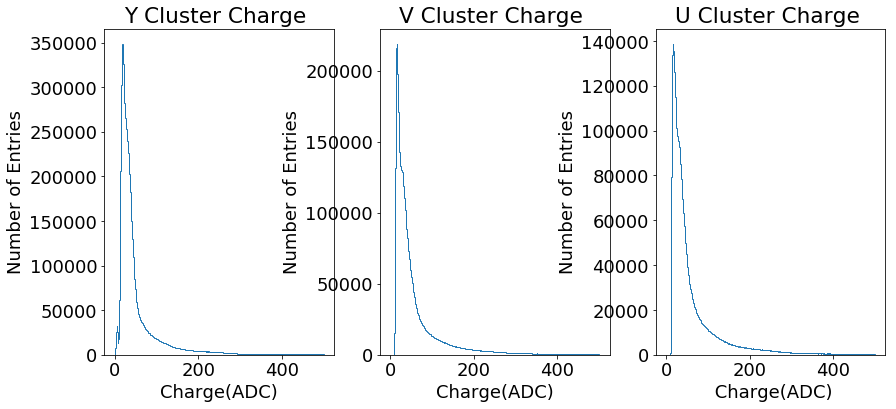

In [43]:
fig = plt.figure(figsize=(14,6))
plt.subplot(1, 3, 1)
BINS = np.linspace(0.1,500,510)
plt.hist(df2['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=1,label='Y Cluster Charge')
#plt.colorbar()
plt.title('Y Cluster Charge ')
#plt.legend(loc=2)
plt.xlabel('Charge(ADC)')
plt.ylabel('Number of Entries')


plt.subplot(1, 3, 2)
plt.hist(df2['V_cluster_charge'].values, bins=BINS,histtype='step',lw=1,label='V Cluster Charge')
#plt.colorbar()
plt.title('V Cluster Charge ')
#plt.legend(loc=2)
plt.xlabel('Charge(ADC)')
plt.ylabel('Number of Entries')

plt.subplot(1, 3, 3)
plt.hist(df2['U_cluster_charge'].values, bins=BINS,histtype='step',lw=1,label='U Cluster Charge')
#plt.colorbar()
plt.title('U Cluster Charge ')
#plt.legend(loc=2)
plt.xlabel(' Charge(ADC)')
plt.ylabel('Number of Entries')






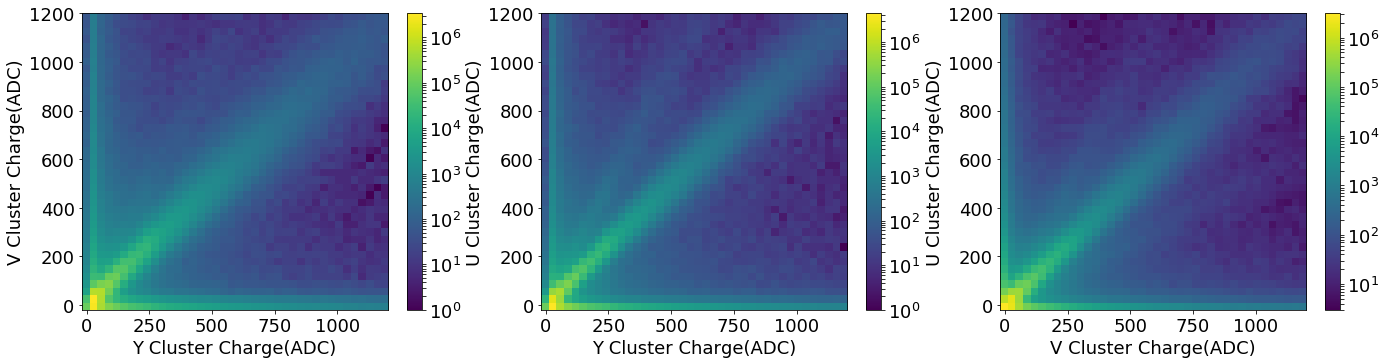

In [44]:

fig = plt.figure(figsize=(48,12))
plt.subplot(2, 6, 1)
plt.hist2d(df2['Y_cluster_charge'].values,df2['V_cluster_charge'].values, bins=(40,40), range=[[-20,1200], [-20,1200]] , norm=LogNorm())
plt.colorbar()
plt.ylabel('V Cluster Charge(ADC)')
plt.xlabel('Y Cluster Charge(ADC)')

plt.subplot(2, 6, 2)
plt.hist2d(df2['Y_cluster_charge'].values,df2['U_cluster_charge'].values, bins=(40,40), range=[[-20,1200], [-20,1200]] , norm=LogNorm())
plt.colorbar()
plt.ylabel('U Cluster Charge(ADC)')
plt.xlabel('Y Cluster Charge(ADC)')

plt.subplot(2, 6, 3)
plt.hist2d(df2['V_cluster_charge'].values,df2['U_cluster_charge'].values, bins=(40,40), range=[[-20,1200], [-20,1200]] , norm=LogNorm())
plt.colorbar()
plt.ylabel('U Cluster Charge(ADC)')
plt.xlabel('V Cluster Charge(ADC)')




plt.show()

1250363


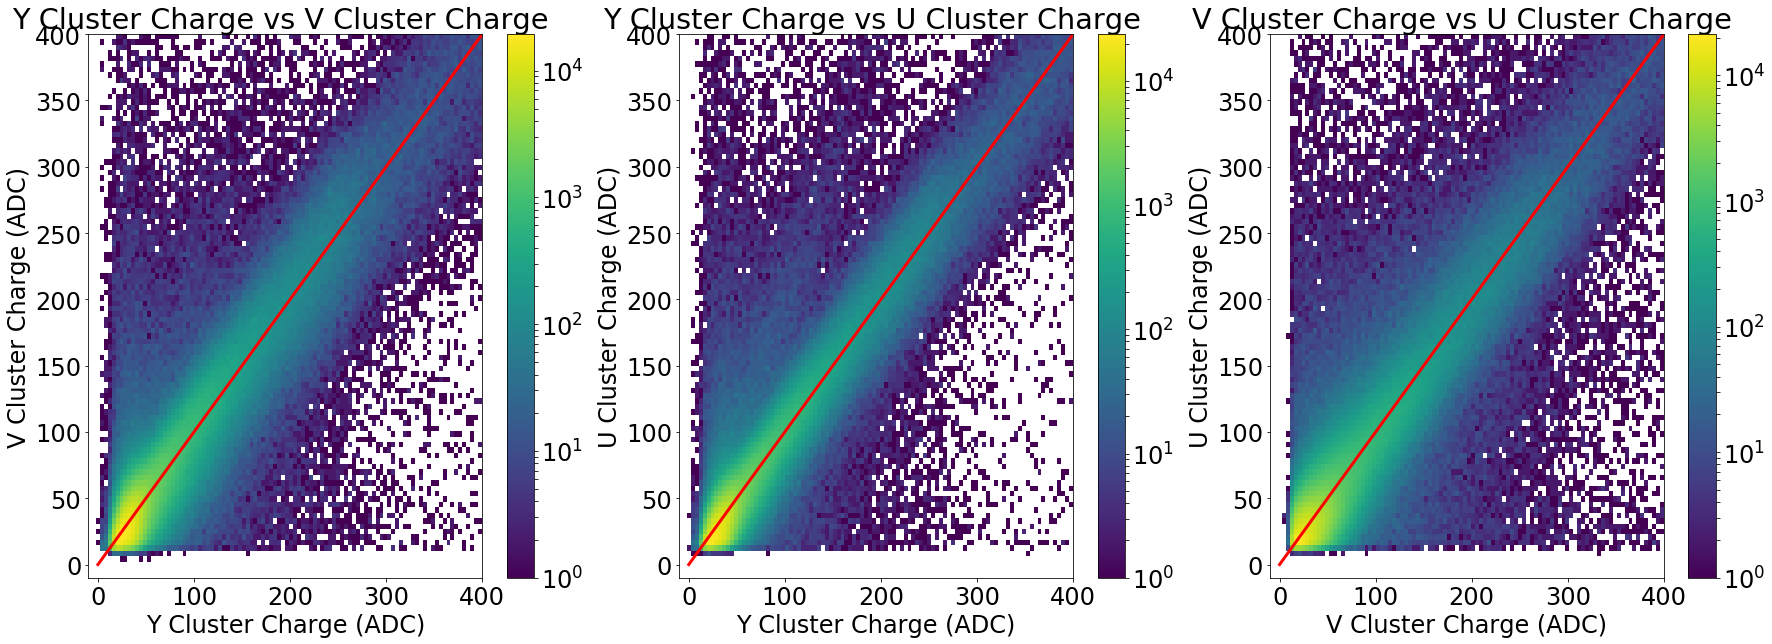

<Figure size 432x288 with 0 Axes>

In [45]:
dfChargeCut = df2.query('(Y_cluster_3d_hit_z>800 or (Y_cluster_3d_hit_z>400 and Y_cluster_3d_hit_z<600)) and U_match_multiplicity>=1 and V_match_multiplicity>=1 and (deltaY<1.0 and deltaY>-1.0)')
print len (dfChargeCut)
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut['Y_cluster_charge'].values,dfChargeCut['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('Y Cluster Charge vs V Cluster Charge ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut['Y_cluster_charge'].values,dfChargeCut['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('Y Cluster Charge vs U Cluster Charge ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut['V_cluster_charge'].values,dfChargeCut['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('V Cluster Charge vs U Cluster Charge ')
#plt.legend(loc=1)
plt.show()

plt.draw()
#fig.savefig('charge11.png', dpi=270)



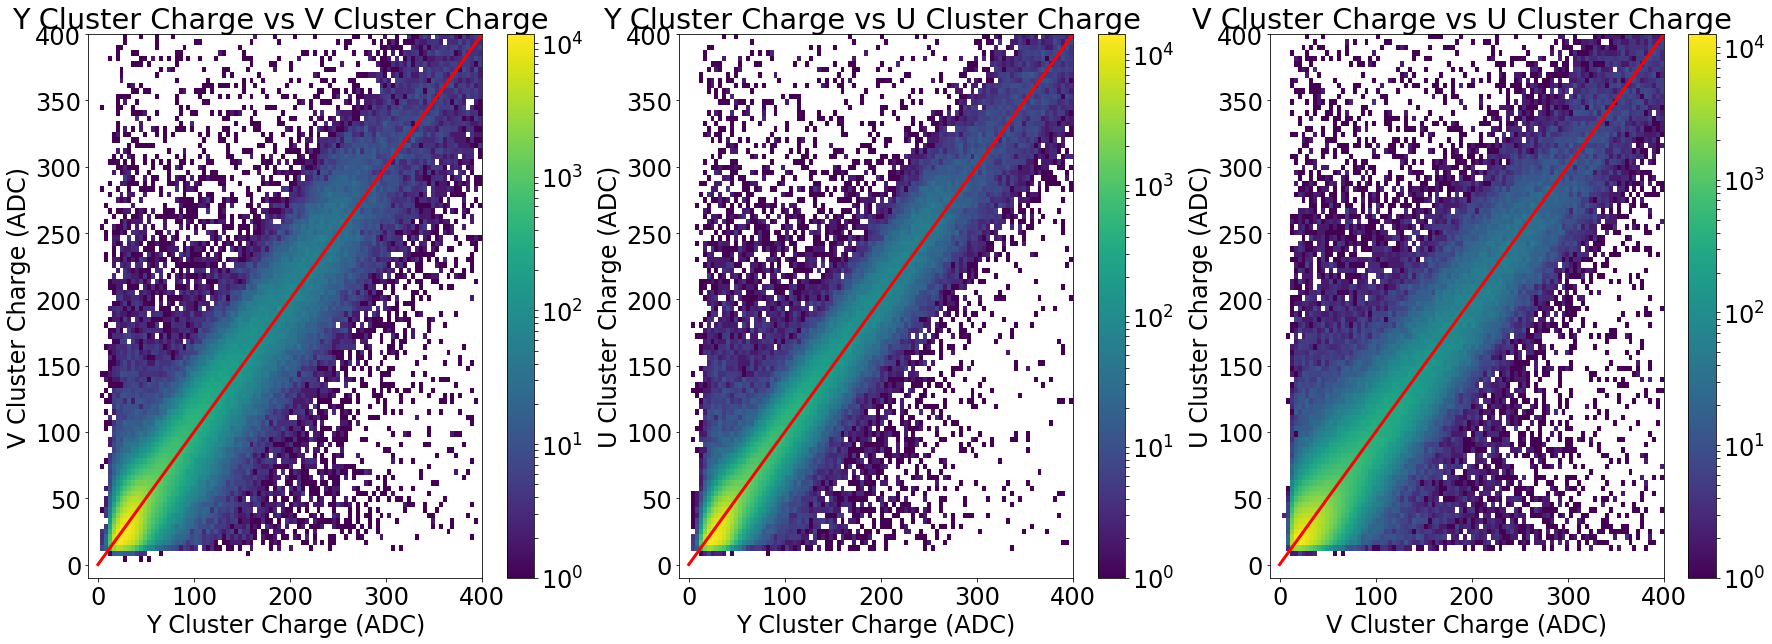

<Figure size 432x288 with 0 Axes>

In [46]:
df_low_clean = df2.query('(Y_cluster_3d_hit_z>800 or (Y_cluster_3d_hit_z>400 and Y_cluster_3d_hit_z<600)) and (U_match_multiplicity==1 and V_match_multiplicity==1 and (deltaY<1.0 and deltaY>-1.0)) and deltaY_smallest<1.0 and Y_cluster_3d_hit_y > -120.0 and Y_cluster_3d_hit_y < 120.0')
#print len (dfChargeCut)
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(df_low_clean['Y_cluster_charge'].values,df_low_clean['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('Y Cluster Charge vs V Cluster Charge ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(df_low_clean['Y_cluster_charge'].values,df_low_clean['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('Y Cluster Charge vs U Cluster Charge ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(df_low_clean['V_cluster_charge'].values,df_low_clean['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('V Cluster Charge vs U Cluster Charge ')
#plt.legend(loc=1)
plt.show()

plt.draw()
#fig.savefig('charge11.png', dpi=270)



3969863
3969863


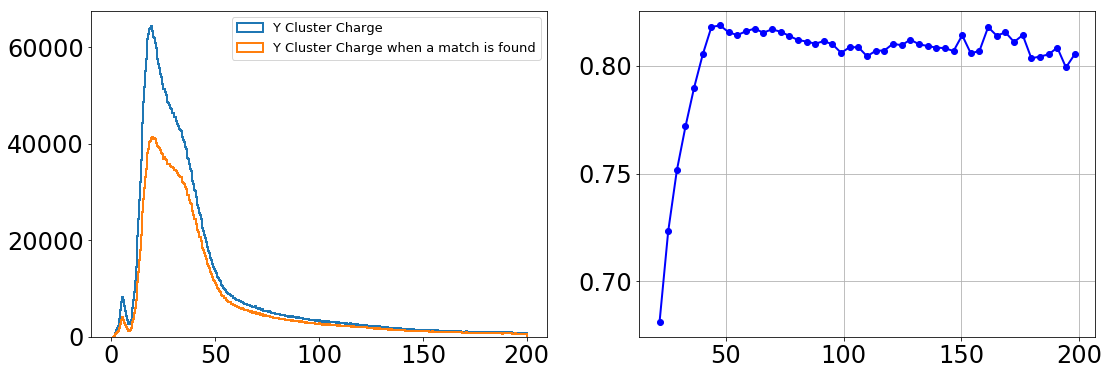

In [47]:
dfcut_all = df2.query('(Y_cluster_3d_hit_z>800 or (Y_cluster_3d_hit_z>400 and Y_cluster_3d_hit_z<600))')
dfcut_match = df2.query('(Y_cluster_3d_hit_z>800 or (Y_cluster_3d_hit_z>400 and Y_cluster_3d_hit_z<600)) and Y_cluster_3d_hit_y > -120.0 and Y_cluster_3d_hit_y < 120.0')
dfcut_9999 = df2.query('(Y_cluster_3d_hit_z>800 or (Y_cluster_3d_hit_z>400 and Y_cluster_3d_hit_z<600)) and Y_cluster_3d_hit_y != -9999.0')
print (len(dfcut_match))
print (len(dfcut_9999))
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(dfcut_all['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(dfcut_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
#plt.yscale('log')

plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)


BINS = np.linspace(20,200,50)

vals2D, bins2D = np.histogram(dfcut_all['Y_cluster_charge'].values,bins=BINS)
vals3D, bins3D = np.histogram(dfcut_match['Y_cluster_charge'].values,bins=BINS)
binC = 0.5*(bins2D[1:]+bins2D[:-1])
vals2D = vals2D.astype(float)
#print vals2D
vals3D = vals3D.astype(float)
ratio_v = []
for i,v in enumerate(vals2D):
    if (v == 0):
        ratio_v.append(0.)
    else:
        ratio_v.append(vals3D[i]/v)
#print ratio_v
plt.plot(binC,ratio_v,'bo-',lw=2)
plt.grid()
plt.show()

In [48]:
print 1./(240.*23.6/(0.5*1e6))

88.2768361582


In [49]:
# Argon properties

#LAr temperature
T = 89
# density
rho = 1.38 # g/cm^3

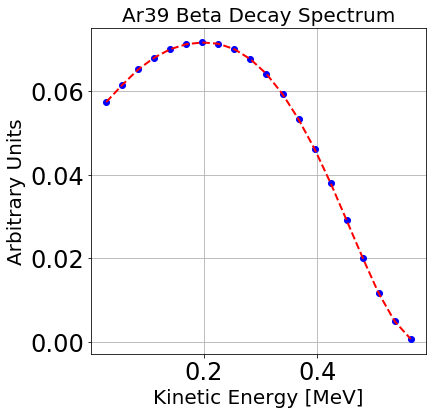

In [50]:
# Ar 39 energy spectrum

Ar39_E_v = [0.0282,0.0565,0.0847,0.1130,0.1412,0.1695,0.1977,0.2260,\
            0.2542,0.2825,0.3107,0.3390,0.3672,0.3955,0.4237,0.4520,0.4802,0.5085,0.5367,0.5650]

Ar39_A_v = [5.73E-02,6.14E-02,6.51E-02,6.79E-02,6.99E-02,7.11E-02,7.15E-02,\
            7.12E-02,6.99E-02,6.75E-02,6.40E-02,5.92E-02,5.32E-02,4.61E-02,\
            3.80E-02,2.91E-02,2.02E-02,1.17E-02,5.02E-03,7.77E-04]

# spline
Ar39spectrum = interp1d(Ar39_E_v,Ar39_A_v)

fig = plt.figure(figsize=(6,6))
plt.plot(Ar39_E_v,Ar39_A_v,'bo',lw=2)
xvals = np.linspace(Ar39_E_v[0],Ar39_E_v[-1],100)
plt.plot(xvals,Ar39spectrum(xvals),'r--',lw=2)
plt.xlabel("Kinetic Energy [MeV]",fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Beta Decay Spectrum',fontsize=20)
plt.grid()
plt.show()

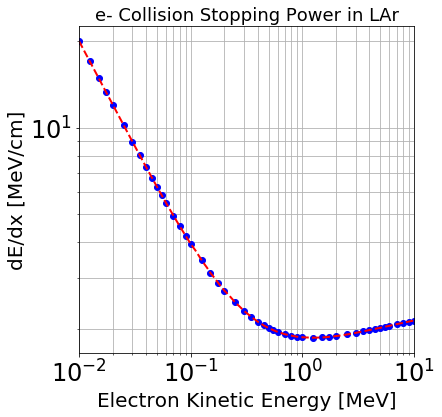

In [51]:
# load electron energy loss info [NIST]
fin = open('/uboone/app/users/abhat/gammacatcher_v08_00_00_09/srcs/ubreco/ubreco/GammaCatcher/nist_esar_ar_1p38density_188eV.txt','r')
ctr = 0

energy_v = []
collision_v = []

for line in fin:
    ctr += 1
    
    if (ctr < 9):
        continue
    words = line.split()
    if (len(words) != 4):
        continue
    energy_v.append   ( float(words[0])       )
    collision_v.append( float(words[1]) * rho )
    
energy_v    = np.array(energy_v   )
collision_v = np.array(collision_v)

dEdx = interp1d(energy_v,collision_v)

fig = plt.figure(figsize=(6,6))
plt.plot(energy_v,collision_v,'bo',lw=2)
xvals = np.linspace(0.01,10,1000)
plt.plot(xvals,dEdx(xvals),'r--',lw=2)
plt.xlim([0.01,10])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('dE/dx [MeV/cm]',fontsize=20)
plt.title('e- Collision Stopping Power in LAr',fontsize=18)
plt.show()

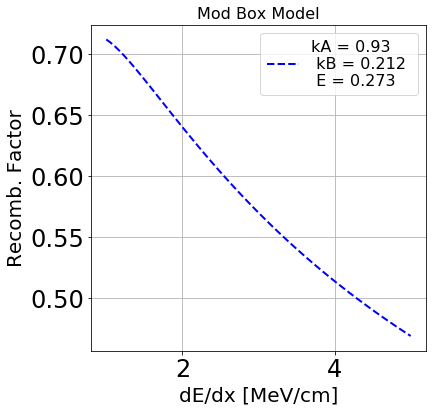

In [52]:
# Ion recombination model

# recombination model
def RecombModBox(dEdx, A, B, Efield):
    B /= (rho * Efield)
    r = np.log( dEdx * B + A ) / ( dEdx * B )
    return 1-r

def RecombBirks(dEdx, A, k, Efield):
    k /= rho
    r = ( 1 + k * dEdx / Efield ) / A
    return 1/r


fRecombA  = 0.8 # +- 0.003
fRecombk  = 0.0486 # +- 0.0006

fModBoxA = 0.93
fModBoxB = 0.212#0.212#3

fEfield  = 0.273

fig = plt.figure(figsize=(6,6))
dedx_v = np.linspace(1,5,100)
R_v = []
for dedx in dedx_v:
    R_v.append(1-RecombModBox(dedx,fModBoxA,fModBoxB,fEfield))
plt.plot(dedx_v,R_v,'b--',lw=2,label='kA = 0.93 \n kB = 0.212 \n E = 0.273')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]',fontsize=20)
plt.ylabel('Recomb. Factor',fontsize=20)
plt.title('Mod Box Model',fontsize=16)
plt.legend(loc=1,fontsize=16)
plt.show()

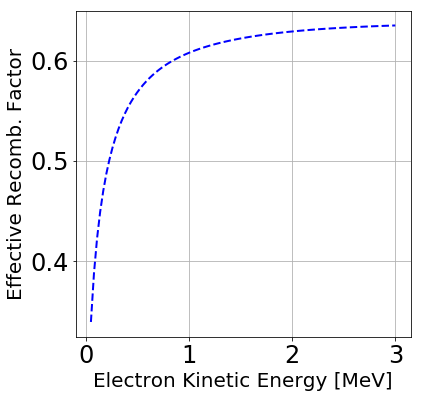

In [53]:
# Apply recombination model to get effective recombination for each electron energy
# return effective charge quenching amount
# effective recombination = amount of recombination for total energy lost by electron of given KE.

def EffectiveRecomb(ElectronEnergy,Estep,Field):
    
    # keep track of total energy lost
    dEtot = 0.
    # and total energy "seen" after recomb.
    dEobs = 0.
    
    while (ElectronEnergy > 1e-2):
    
        dedx = dEdx(ElectronEnergy)
        R    = RecombModBox(dedx,fModBoxA,fModBoxB,Field)
        
        dEtot += Estep
        dEobs += Estep * (1-R)
        
        ElectronEnergy -= Estep
        
        #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
        
    # perform last step
    dedx = dEdx(1e-2)
    dEtot += ElectronEnergy
    dEobs += ElectronEnergy * (1 - RecombModBox(dedx,fModBoxA,fModBoxB,Field))
    #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
    
    return dEobs/dEtot

def Charge(ElectronEnergy,efield):
    
    EffRecomb = EffectiveRecomb(ElectronEnergy,0.01,efield)
    Eobs = ElectronEnergy * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    return Qobs

EffectiveRecomb_v = np.vectorize(EffectiveRecomb)
Charge_v = np.vectorize(Charge)

EffectiveRecomb(0.25,0.01,0.273)

fig = plt.figure(figsize=(6,6))
Evals = np.linspace(0.05,3,100)
Rvals = []
for E in Evals:
    Rvals.append(EffectiveRecomb(E,0.01,0.273))
plt.plot(Evals,Rvals,'b--',lw=2)
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('Effective Recomb. Factor',fontsize=20)
plt.grid()
plt.show()



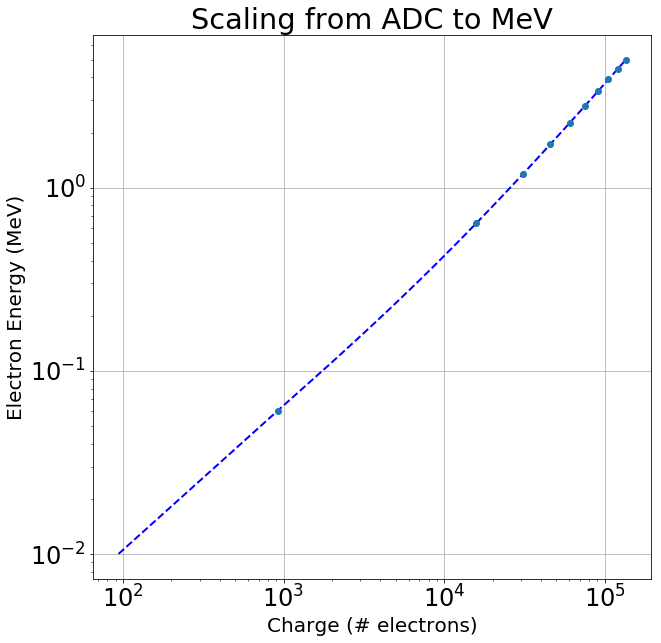

In [54]:
fig = plt.figure(figsize=(10,10))
Evals = np.linspace(0.01,5,100)
Qvals = []
for E in Evals:
    #R = EffectiveRecomb(E,0.01,0.273)
    Q = Charge(E,0.273)
    Qvals.append(Q)
    
fQ2E = interp1d(Qvals, Evals,kind='cubic')
xnew = np.linspace(Qvals[1], Qvals[-1], num=10, endpoint=True)
plt.plot(Qvals,Evals,'b--',xnew, fQ2E(xnew),'o',lw=2)
plt.ylabel('Electron Energy (MeV)',fontsize=20)
plt.xlabel('Charge (# electrons)',fontsize=20)
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.title('Scaling from ADC to MeV')
plt.show()
fig.savefig('Q2E.png', dpi=300)

In [55]:
# calculate Ar39 spectrum [in drifted electrons] accounting for recombination

# sample randomly from Ar39 spectrum and calculate visible charge for each event
Ar39_Q_v = []

Eavg = 0.

for n in xrange(5000):
    
    found = False
    while (found == False):
        Eval = np.random.uniform(Ar39_E_v[0],Ar39_E_v[-1])
        if (Ar39spectrum(Eval) > np.random.uniform(0,0.08) ): # 0.08 due to values in 1st histogram in notebook
            found = True
    Eavg += Eval
    EffRecomb = EffectiveRecomb(Eval,0.01,0.273)
    Eobs = Eval * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    Ar39_Q_v.append(Qobs)
Eavg /= 5000
print Eavg

0.238126969758


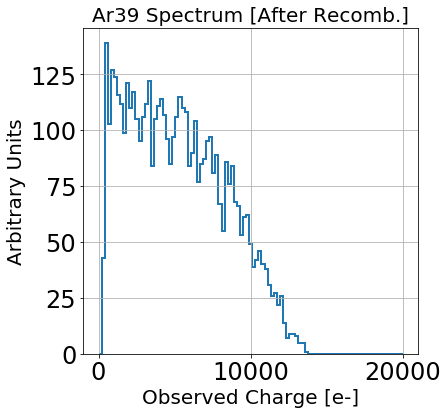

In [56]:
fig = plt.figure(figsize=(6,6))
plt.hist(Ar39_Q_v,bins=np.linspace(0,2e4,100),histtype='step',lw=2)
plt.grid()
plt.xlabel('Observed Charge [e-]',fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Spectrum [After Recomb.]',fontsize=20)
plt.show()

In [57]:
elec_KE = np.linspace(0.05,1,100)
elec_Q_273 = []
elec_Q_500 = []
for ke in elec_KE:
    elec_Q_273.append(Charge(ke,0.273)/1e3)
    elec_Q_500.append(Charge(ke,0.500)/1e3)

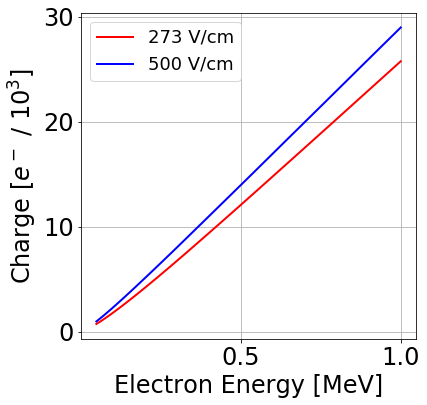

In [58]:
fig = plt.figure(figsize=(6,6))
plt.plot(elec_KE,elec_Q_273,lw=2,color='r',label='273 V/cm')
plt.plot(elec_KE,elec_Q_500,lw=2,color='b',label='500 V/cm')
plt.grid()
plt.xlabel('Electron Energy [MeV]')
plt.ylabel('Charge [$e^-$ / $10^3$]')
plt.legend(loc=2,fontsize=18)
plt.show()

In [59]:
print Charge(0.2,0.273)


4129.221044959042


In [60]:
def E_recoY(df,gain):
    YQ = df['Y_cluster_charge']
    QrecoY = YQ * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY = fQ2E(QrecoY)
    return ErecoY

def E_recoY_low(df,gain):
    YQ_low = df['Y_cluster_charge']
    QrecoY_low = YQ_low * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_low = fQ2E(QrecoY_low)
    return ErecoY_low


def E_recoU(df,gain):
    UQ = df['U_cluster_charge']
    QrecoU = UQ * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU = fQ2E(QrecoU)
    return ErecoU
def E_recoV(df,gain):
    VQ = df['V_cluster_charge']
    QrecoV = VQ * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV = fQ2E(QrecoV)
    return ErecoV
  
    #E_r=0.01 # MeV
    #while E_r<10:
    #    Eff_Recomb = EffectiveRecomb(E_r,0.01,0.273)
    #    Q_hypo=Eff_Recomb*E_r # MeV
    #    if Q_hypo>Qreco:
    #        return E_r
    #    E_r+=0.01
    #    
def E_reco_simple(YQ,gain):
    #YQ = df['Y_cluster_charge']
    Qreco = YQ * gain * (23.6/1e6) # MeV w/ no recomb factor
    E_r=0.01 # MeV
    while E_r<10:
        Eff_Recomb = EffectiveRecomb(E_r,0.01,0.273)
        Q_hypo=Eff_Recomb*E_r # MeV
        if Q_hypo>Qreco:
            return E_r
        E_r+=0.01

In [61]:
dfcut_match_sub = dfcut_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_sub   = dfcut_all.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_sub['energy'] = E_recoY(dfcut_match_sub,238.4)
dfcut_all_sub['energy']   = E_recoY(dfcut_all_sub,238.4)


#dfcut_match_sub_low = dfcut_match_low.query('Y_cluster_charge * 238.4 < 130000.')# and Y_cluster_charge * 238.4 > 800.')
#dfcut_all_sub_low   = dfcut_all_low.query('Y_cluster_charge * 238.4 < 130000.')# and Y_cluster_charge * 238.4 > 800.')

#dfcut_match_sub_low['energy'] = E_recoY_low(dfcut_match_sub,238.4)
#dfcut_all_sub_low['energy']   = E_recoY_low(dfcut_all_sub,238.4)

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


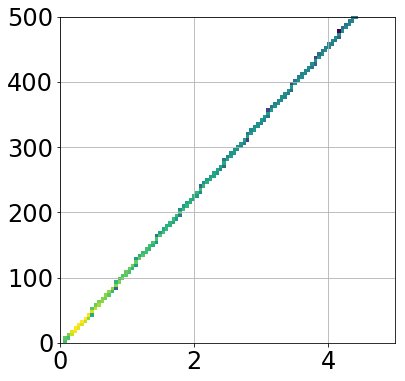

In [62]:
fig = plt.figure(figsize=(6,6))
B = (np.linspace(0,5,100),np.linspace(0,500,100))
plt.hist2d(dfcut_match_sub['energy'].values,dfcut_match_sub['Y_cluster_charge'],bins=B,norm=LogNorm())
plt.grid()
plt.show()

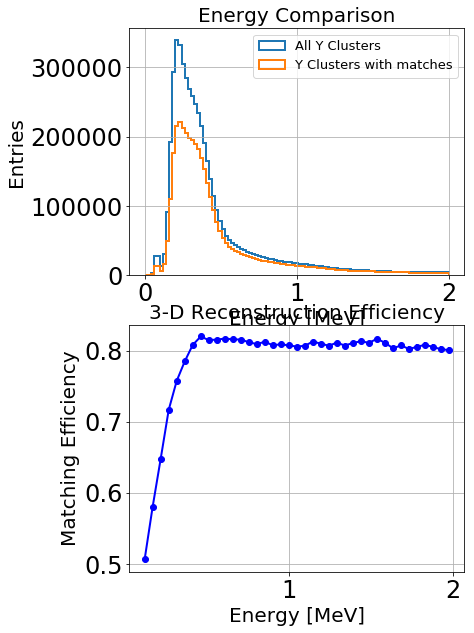

In [63]:
fig = plt.figure(figsize=(6,10))
plt.subplot(2, 1,1)

BINS = np.linspace(0,2,100)
plt.hist(dfcut_all_sub['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_sub['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(2,1, 2)


BINS = np.linspace(0.1,2,40)

vals2D, bins2D = np.histogram(dfcut_all_sub['energy'].values,bins=BINS)
vals3D, bins3D = np.histogram(dfcut_match_sub['energy'].values,bins=BINS)
binC = 0.5*(bins2D[1:]+bins2D[:-1])
vals2D = vals2D.astype(float)
#print vals2D
vals3D = vals3D.astype(float)
ratio_v = []
errors_v = []
for i,v in enumerate(vals2D):
    if (v == 0):
        ratio_v.append(0.)
        errors_v.append(0.)
    else:
        f = vals3D[i]/v
        ratio_v.append(f)
        errors_v.append( np.sqrt(f*(1-f)/v) )
#print ratio_v
plt.errorbar(binC,ratio_v,yerr=errors_v,fmt='o-',color='b',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency',fontsize=20)

plt.grid()
plt.show()
fig.savefig('Ratio.png', dpi=300)


/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

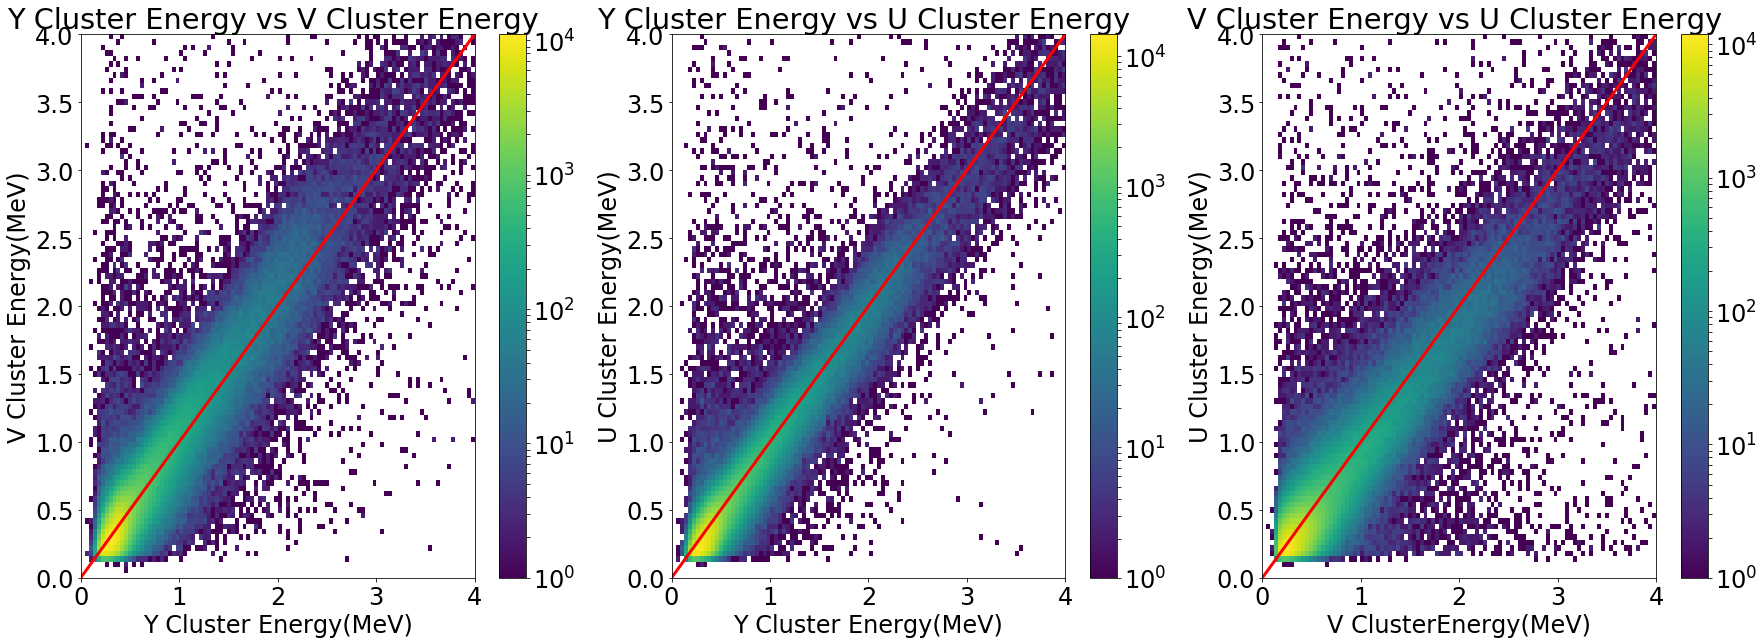

In [64]:
CUT = '(Y_cluster_3d_hit_z>800 or (Y_cluster_3d_hit_z>400 and Y_cluster_3d_hit_z<600))'
CUT += ' and U_match_multiplicity==1 and V_match_multiplicity==1 and (deltaY<0.5 and deltaY>-0.5)'
CUT += ' and Y_cluster_charge * 240 < 130000. '
CUT += ' and V_cluster_charge * 240 < 130000. '
CUT += ' and U_cluster_charge * 240 < 130000. '

dfChargeCut = df2.query(CUT)

dfChargeCut['energyY'] = E_recoY(dfChargeCut,238.4)
dfChargeCut['energyU'] = E_recoU(dfChargeCut,232)
dfChargeCut['energyV'] = E_recoV(dfChargeCut,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut['energyY'].values,dfChargeCut['energyV'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('Y Cluster Energy vs V Cluster Energy ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut['energyY'].values,dfChargeCut['energyU'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('Y Cluster Energy vs U Cluster Energy ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut['energyV'].values,dfChargeCut['energyU'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('V Cluster Energy vs U Cluster Energy ')
#plt.legend(loc=1)

plt.show
plt.draw()
fig.savefig('Energy1-1.png', dpi=270)



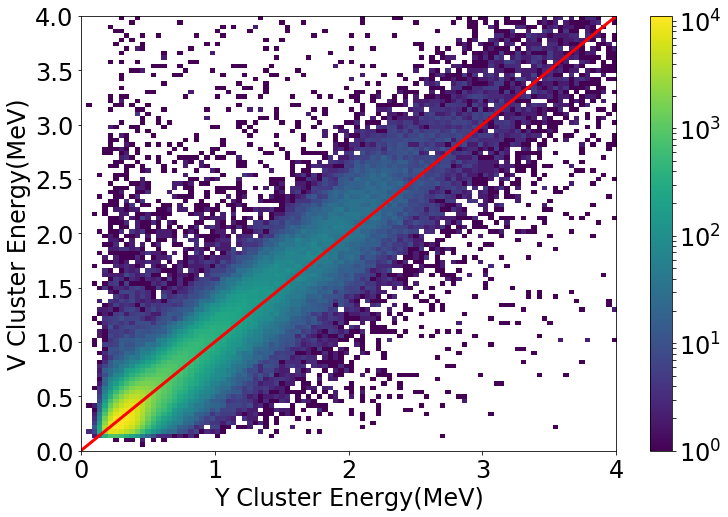

In [65]:
fig = plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 24})

plt.hist2d(dfChargeCut['energyY'].values,dfChargeCut['energyV'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
#plt.title('Y Cluster Energy vs V Cluster Energy ')
fig.savefig('Energy1-1.png', dpi=500)

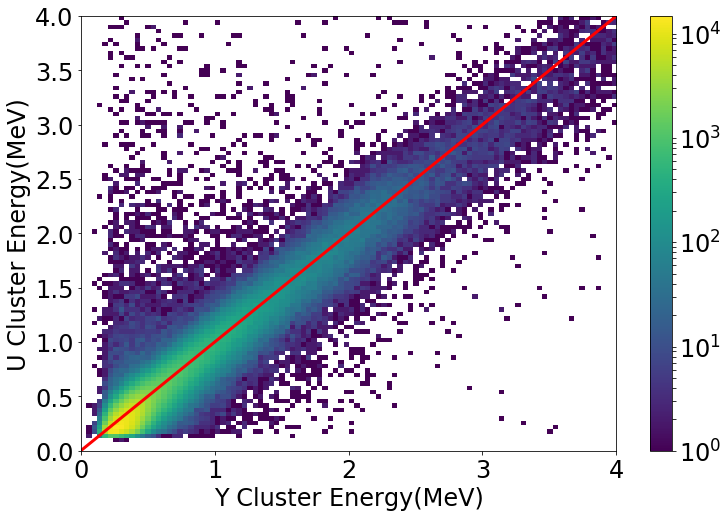

In [66]:
fig = plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 24})

plt.hist2d(dfChargeCut['energyY'].values,dfChargeCut['energyU'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
#plt.title('Y Cluster Energy vs V Cluster Energy ')
fig.savefig('Energy1-1.png', dpi=500)